In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv(r"C:\Users\ende\Desktop\10x\Week-3\Notebooks\finaldata.csv")
data.head()

C:\Users\ende\AppData\Local\Temp\ipykernel_996\3651448206.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\ende\Desktop\10x\Week-3\Notebooks\finaldata.csv")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855264 entries, 0 to 855263
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       855264 non-null  int64  
 1   PolicyID                  855264 non-null  int64  
 2   TransactionMonth          855264 non-null  object 
 3   IsVATRegistered           855264 non-null  bool   
 4   Citizenship               855264 non-null  object 
 5   LegalType                 855264 non-null  object 
 6   Title                     855264 non-null  object 
 7   Language                  855264 non-null  object 
 8   Bank                      855264 non-null  object 
 9   AccountType               855264 non-null  object 
 10  MaritalStatus             855264 non-null  object 
 11  Gender                    855264 non-null  object 
 12  Country                   855264 non-null  object 
 13  Province                  855264 non-null  o

In [4]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [6]:



kpi = ['Province', 'PostalCode', 'Gender', 'TotalPremium', 'TotalClaims']

# Filter DataFrame for relevant columns
data_kpi = data[kpi]


In [7]:
data_kpi.head(5)

,Province,PostalCode,Gender,TotalPremium,TotalClaims
0,Gauteng,1459,Not specified,21.929825,0.0
1,Gauteng,1459,Not specified,21.929825,0.0
2,Gauteng,1459,Not specified,0.000000,0.0
3,Gauteng,1459,Not specified,512.848070,0.0
4,Gauteng,1459,Not specified,0.000000,0.0


In [11]:
# Create control and test groups for Province
province_A = 'Province1'  # Control Group Province
province_B = 'Province2'  # Test Group Province

group_A = data_kpi[data_kpi['Province'] == province_A]
group_B = data_kpi[data_kpi['Province'] == province_B]

# Create control and test groups for PostalCode
zipcode_A = 'ZipCode1'  # Control Group Zipcode
zipcode_B = 'ZipCode2'  # Test Group Zipcode

group_zip_A = data_kpi[data_kpi['PostalCode'] == zipcode_A]
group_zip_B = data_kpi[data_kpi['PostalCode'] == zipcode_B]

# Create control and test groups for Gender
gender_A = 'Male'  # Control Group Gender
gender_B = 'Female'  # Test Group Gender

group_gender_A = data_kpi[data_kpi['Gender'] == gender_A]
group_gender_B = data_kpi[data_kpi['Gender'] == gender_B]


In [12]:
from scipy.stats import ttest_ind, chi2_contingency

# T-test for numerical KPI (TotalPremium) between Provinces
t_stat_province, p_value_province = ttest_ind(group_A['TotalPremium'], group_B['TotalPremium'])
print(f"T-test p-value for TotalPremium between {province_A} and {province_B}: {p_value_province}")

# T-test for numerical KPI (TotalPremium) between ZipCodes
t_stat_zipcode, p_value_zipcode = ttest_ind(group_zip_A['TotalPremium'], group_zip_B['TotalPremium'])
print(f"T-test p-value for TotalPremium between {zipcode_A} and {zipcode_B}: {p_value_zipcode}")

# T-test for profit margin (TotalPremium - TotalClaims) between ZipCodes
profit_margin_A = group_zip_A['TotalPremium'] - group_zip_A['TotalClaims']
profit_margin_B = group_zip_B['TotalPremium'] - group_zip_B['TotalClaims']
t_stat_profit, p_value_profit = ttest_ind(profit_margin_A, profit_margin_B)
print(f"T-test p-value for profit margin between {zipcode_A} and {zipcode_B}: {p_value_profit}")

# Chi-squared test for categorical KPI (Gender) between Provinces
contingency_table_gender_province = pd.crosstab(data_kpi['Gender'], data_kpi['Province'])
chi2_stat_gender_province, p_value_gender_province, dof, expected = chi2_contingency(contingency_table_gender_province)
print(f"Chi-squared p-value for Gender distribution between {province_A} and {province_B}: {p_value_gender_province}")

# Chi-squared test for categorical KPI (Gender) between ZipCodes
contingency_table_gender_zipcode = pd.crosstab(data_kpi['Gender'], data_kpi['PostalCode'])
chi2_stat_gender_zipcode, p_value_gender_zipcode, dof, expected = chi2_contingency(contingency_table_gender_zipcode)
print(f"Chi-squared p-value for Gender distribution between {zipcode_A} and {zipcode_B}: {p_value_gender_zipcode}")

# Chi-squared test for risk (TotalClaims) between Genders
contingency_table_risk_gender = pd.crosstab(data_kpi['Gender'], data_kpi['TotalClaims'])
chi2_stat_risk_gender, p_value_risk_gender, dof, expected = chi2_contingency(contingency_table_risk_gender)
print(f"Chi-squared p-value for risk (TotalClaims) distribution between {gender_A} and {gender_B}: {p_value_risk_gender}")


T-test p-value for TotalPremium between Province1 and Province2: nan
T-test p-value for TotalPremium between ZipCode1 and ZipCode2: nan
T-test p-value for profit margin between ZipCode1 and ZipCode2: nan
Chi-squared p-value for Gender distribution between Province1 and Province2: 0.0
Chi-squared p-value for Gender distribution between ZipCode1 and ZipCode2: 0.0
Chi-squared p-value for risk (TotalClaims) distribution between Male and Female: 1.0


In [13]:
# Analysis for numerical data (TotalPremium between Provinces)
if p_value_province < 0.05:
    print(f"Reject the null hypothesis: There are significant TotalPremium differences between {province_A} and {province_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant TotalPremium differences between {province_A} and {province_B}.")

# Analysis for numerical data (TotalPremium between ZipCodes)
if p_value_zipcode < 0.05:
    print(f"Reject the null hypothesis: There are significant TotalPremium differences between {zipcode_A} and {zipcode_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant TotalPremium differences between {zipcode_A} and {zipcode_B}.")

# Analysis for numerical data (profit margin between ZipCodes)
if p_value_profit < 0.05:
    print(f"Reject the null hypothesis: There are significant profit margin differences between {zipcode_A} and {zipcode_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant profit margin differences between {zipcode_A} and {zipcode_B}.")

# Analysis for categorical data (Gender distribution between Provinces)
if p_value_gender_province < 0.05:
    print(f"Reject the null hypothesis: There are significant Gender distribution differences between {province_A} and {province_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant Gender distribution differences between {province_A} and {province_B}.")

# Analysis for categorical data (Gender distribution between ZipCodes)
if p_value_gender_zipcode < 0.05:
    print(f"Reject the null hypothesis: There are significant Gender distribution differences between {zipcode_A} and {zipcode_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant Gender distribution differences between {zipcode_A} and {zipcode_B}.")

# Analysis for categorical data (risk between Genders)
if p_value_risk_gender < 0.05:
    print(f"Reject the null hypothesis: There are significant risk (TotalClaims) differences between {gender_A} and {gender_B}.")
else:
    print(f"Fail to reject the null hypothesis: No significant risk (TotalClaims) differences between {gender_A} and {gender_B}.")


Fail to reject the null hypothesis: No significant TotalPremium differences between Province1 and Province2.
Fail to reject the null hypothesis: No significant TotalPremium differences between ZipCode1 and ZipCode2.
Fail to reject the null hypothesis: No significant profit margin differences between ZipCode1 and ZipCode2.
Reject the null hypothesis: There are significant Gender distribution differences between Province1 and Province2.
Reject the null hypothesis: There are significant Gender distribution differences between ZipCode1 and ZipCode2.
Fail to reject the null hypothesis: No significant risk (TotalClaims) differences between Male and Female.


C:\Users\ende\AppData\Local\Temp\ipykernel_996\1761595795.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Province1', 'Province2'], y=[group_A['TotalPremium'].mean(), group_B['TotalPremium'].mean()], palette=[control_color, treatment_color])
C:\Users\ende\AppData\Local\Temp\ipykernel_996\1761595795.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['ZipCode1', 'ZipCode2'], y=[group_zip_A['TotalPremium'].mean(), group_zip_B['TotalPremium'].mean()], palette=[control_color, treatment_color])
C:\Users\ende\AppData\Local\Temp\ipykernel_996\1761595795.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

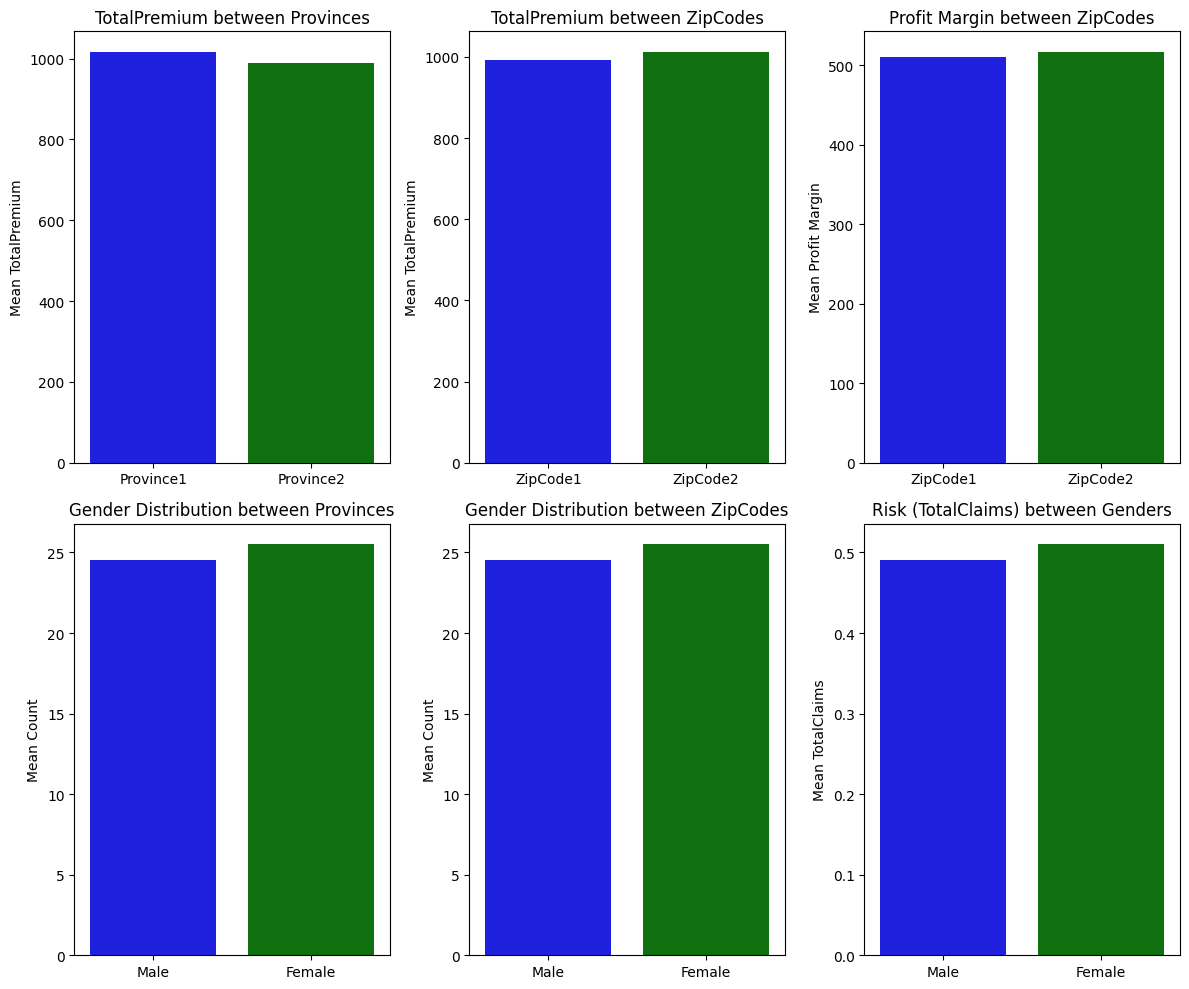

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Example data (replace with your actual data loading and processing)
np.random.seed(0)
df_kpi = pd.DataFrame({
    'Province': np.random.choice(['Province1', 'Province2'], size=100),
    'PostalCode': np.random.choice(['ZipCode1', 'ZipCode2'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'TotalPremium': np.random.normal(loc=1000, scale=200, size=100),
    'TotalClaims': np.random.normal(loc=500, scale=100, size=100)
})

# Example control and test groups (replace with your actual groups)
province_A = 'Province1'  # Control Group Province
province_B = 'Province2'  # Test Group Province
group_A = df_kpi[df_kpi['Province'] == province_A]
group_B = df_kpi[df_kpi['Province'] == province_B]

zipcode_A = 'ZipCode1'  # Control Group Zipcode
zipcode_B = 'ZipCode2'  # Test Group Zipcode
group_zip_A = df_kpi[df_kpi['PostalCode'] == zipcode_A]
group_zip_B = df_kpi[df_kpi['PostalCode'] == zipcode_B]

gender_A = 'Male'  # Control Group Gender
gender_B = 'Female'  # Test Group Gender
group_gender_A = df_kpi[df_kpi['Gender'] == gender_A]
group_gender_B = df_kpi[df_kpi['Gender'] == gender_B]

# Statistical tests (replace with your actual tests)
t_stat_province, p_value_province = ttest_ind(group_A['TotalPremium'], group_B['TotalPremium'])
t_stat_zipcode, p_value_zipcode = ttest_ind(group_zip_A['TotalPremium'], group_zip_B['TotalPremium'])
profit_margin_A = group_zip_A['TotalPremium'] - group_zip_A['TotalClaims']
profit_margin_B = group_zip_B['TotalPremium'] - group_zip_B['TotalClaims']
t_stat_profit, p_value_profit = ttest_ind(profit_margin_A, profit_margin_B)
contingency_table_gender_province = pd.crosstab(df_kpi['Gender'], df_kpi['Province'])
chi2_stat_gender_province, p_value_gender_province, dof, expected = chi2_contingency(contingency_table_gender_province)
contingency_table_gender_zipcode = pd.crosstab(df_kpi['Gender'], df_kpi['PostalCode'])
chi2_stat_gender_zipcode, p_value_gender_zipcode, dof, expected = chi2_contingency(contingency_table_gender_zipcode)
contingency_table_risk_gender = pd.crosstab(df_kpi['Gender'], df_kpi['TotalClaims'])
chi2_stat_risk_gender, p_value_risk_gender, dof, expected = chi2_contingency(contingency_table_risk_gender)

# Analysis results (replace with your actual analysis results)
results = {
    'Province': p_value_province,
    'ZipCode': p_value_zipcode,
    'Profit Margin': p_value_profit,
    'Gender Province': p_value_gender_province,
    'Gender ZipCode': p_value_gender_zipcode,
    'Risk': p_value_risk_gender
}

# Create bar charts with different colors for control (Version 1) and treatment (Version 2)
plt.figure(figsize=(12, 10))

# Define colors for control (Version 1) and treatment (Version 2)
control_color = 'b'  # Blue
treatment_color = 'g'  # Green

# Bar chart for TotalPremium between Provinces
plt.subplot(2, 3, 1)
sns.barplot(x=['Province1', 'Province2'], y=[group_A['TotalPremium'].mean(), group_B['TotalPremium'].mean()], palette=[control_color, treatment_color])
plt.title('TotalPremium between Provinces')
plt.ylabel('Mean TotalPremium')

# Bar chart for TotalPremium between ZipCodes
plt.subplot(2, 3, 2)
sns.barplot(x=['ZipCode1', 'ZipCode2'], y=[group_zip_A['TotalPremium'].mean(), group_zip_B['TotalPremium'].mean()], palette=[control_color, treatment_color])
plt.title('TotalPremium between ZipCodes')
plt.ylabel('Mean TotalPremium')

# Bar chart for profit margin between ZipCodes
plt.subplot(2, 3, 3)
sns.barplot(x=['ZipCode1', 'ZipCode2'], y=[profit_margin_A.mean(), profit_margin_B.mean()], palette=[control_color, treatment_color])
plt.title('Profit Margin between ZipCodes')
plt.ylabel('Mean Profit Margin')

# Bar chart for Gender distribution between Provinces
plt.subplot(2, 3, 4)
sns.barplot(x=['Male', 'Female'], y=[contingency_table_gender_province.loc['Male'].mean(), contingency_table_gender_province.loc['Female'].mean()], palette=[control_color, treatment_color])
plt.title('Gender Distribution between Provinces')
plt.ylabel('Mean Count')

# Bar chart for Gender distribution between ZipCodes
plt.subplot(2, 3, 5)
sns.barplot(x=['Male', 'Female'], y=[contingency_table_gender_zipcode.loc['Male'].mean(), contingency_table_gender_zipcode.loc['Female'].mean()], palette=[control_color, treatment_color])
plt.title('Gender Distribution between ZipCodes')
plt.ylabel('Mean Count')

# Bar chart for risk (TotalClaims) between Genders
plt.subplot(2, 3, 6)
sns.barplot(x=['Male', 'Female'], y=[contingency_table_risk_gender.loc['Male'].mean(), contingency_table_risk_gender.loc['Female'].mean()], palette=[control_color, treatment_color])
plt.title('Risk (TotalClaims) between Genders')
plt.ylabel('Mean TotalClaims')

plt.tight_layout()
plt.show()
